In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.metrics import r2_score

In [2]:
sns.set(rc={"figure.figsize":(12, 8)})
pd.set_option("display.max_columns", None)

# Import data

In [4]:
data = pd.read_csv('../../tresboncoin/data/master/master_with_fuzzy_and_cleaning.csv')
#data.drop(columns=['Unnamed: 0'], inplace=True)
data.shape

(16179, 23)

# Feature engineering

## Calculated

In [6]:
def km_per_year(km, bike_year):
    if (datetime.now().year- bike_year) == 0:
        return km
    return km / (datetime.now().year- bike_year)

data['km/year'] = data.apply(lambda x: km_per_year(x['mileage'],x['bike_year']), axis=1)

In [7]:
def price_per_cc_per_km(cc, price, mileage):
    return (price/cc) / mileage

data['price/cc/km'] = data.apply(lambda x: price_per_cc_per_km(x['engine_size'],x['price'], x['mileage'] ), axis=1)

# Explore data

In [8]:
data.model.value_counts()

r1200rt                              130
mp3500lt                             118
z900                                 107
r1200                                106
r1200gs                              102
                                    ... 
r1200rtr1200rt                         1
corsarozz                              1
cb600fhornetn°7984                     1
msx1252016                             1
eliminator600accidentéersvn°10716      1
Name: model, Length: 4190, dtype: int64

In [9]:
data.model_submodel_db.value_counts()

r1200rt                    335
tmax                       259
niken                      163
fjr1300ae                  156
mt07                       156
                          ... 
smx450fcompetition           1
titanyzf1000rthunderace      1
fes125pantheon               1
bandit1250s                  1
kingquad750axicamo           1
Name: model_submodel_db, Length: 1680, dtype: int64

In [10]:
data.model.nunique()

4190

In [11]:
data.model_submodel_db.nunique()

1680

## Price
### vs mileage (km) per category

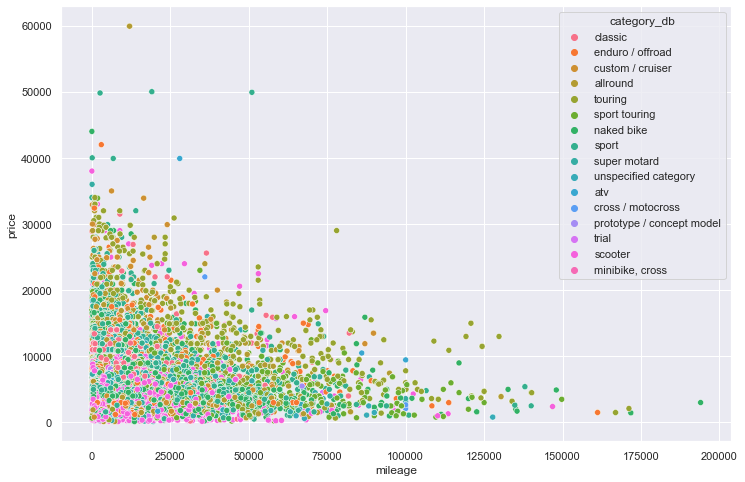

In [12]:
sns.scatterplot(x='mileage', y='price', hue='category_db', data=data);

### vs mileage (km) per engine size

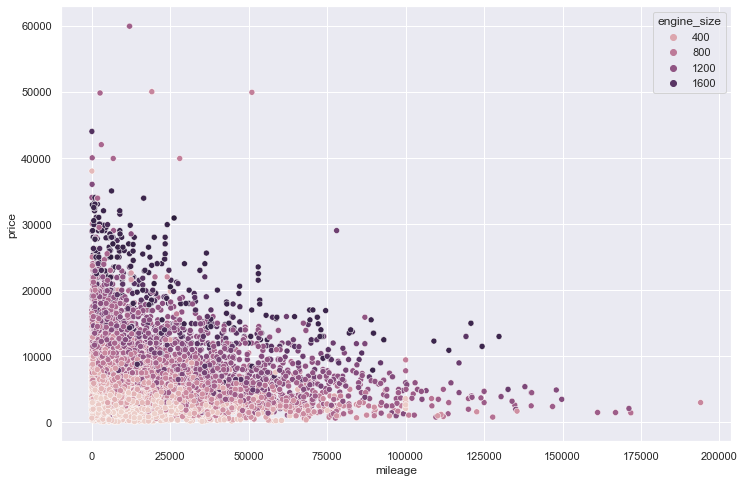

In [15]:
sns.scatterplot(x='mileage', y='price', hue='engine_size', data=data);

### vs mileage (km) per power range

In [16]:
data.head()

,url,uniq_id,brand,bike_year,mileage,bike_type,price,model,engine_size,date_scrapped,brand_db,model_db,model_submodel_db,year_db,category_db,engine_type_db,engine_size_db,power_db,torque_db,compression_db,cooling_system_db,dry_weight_db,power/weight_ratio_db,km/year,price/cc/km
0,https://www.motoplanete.com/occasion-moto/3254...,motoplanete-32546,royalenfield,2003,9476.0,Routière & GT,2390.0,bullet,350.0,2021/06/04 - 22h19,enfield,bullet500,bullet500,2015.0,classic,single cylinder,499.0,26.1,40.9,8.5:1,Air,NaN,NaN,526.444444,0.000721
1,https://www.motoplanete.com/occasion-moto/4186...,motoplanete-41862,honda,2021,501.0,Trail,16599.0,africatwin,1100.0,2021/06/04 - 22h19,honda,africatwin,africatwin,2020.0,enduro / offroad,twin,1084.0,101.0,104.4,10.1:1,Liquid,NaN,NaN,501.000000,0.030120
2,https://www.motoplanete.com/occasion-moto/3732...,motoplanete-37320,gasgas,2021,300.0,Enduro,8590.0,ec,300.0,2021/06/04 - 22h19,gasgas,ec250,ec2504t,2010.0,enduro / offroad,single cylinder,249.3,NaN,NaN,NaN,Liquid,110.0,NaN,300.000000,0.095444
3,https://www.motoplanete.com/occasion-moto/4116...,motoplanete-41168,indian,2020,673.0,Roadster,12900.0,ftr1200sreplica,1200.0,2021/06/04 - 22h19,indian,ftr1200,ftr1200,2019.0,custom / cruiser,v2,1203.0,123.0,117.9,12.5:1,Liquid,230.0,0.5347,673.000000,0.015973
4,https://www.motoplanete.com/occasion-moto/4149...,motoplanete-41499,kawasaki,2016,19200.0,Trail,9990.0,versys1000,1000.0,2021/06/04 - 22h19,kawasaki,versys1000,versys1000,2018.0,allround,in-line four,1043.0,120.0,102.0,10.3:1,Liquid,NaN,NaN,3840.000000,0.000520


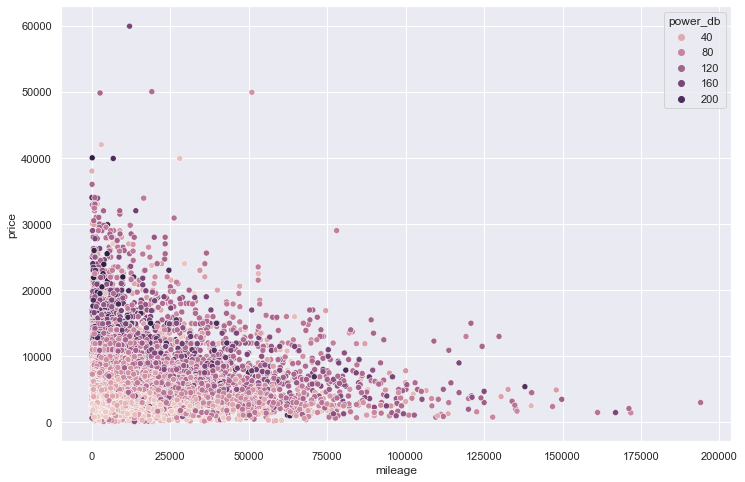

In [17]:
sns.scatterplot(x='mileage', y='price', hue='power_db', data=data);

### vs year of release per category

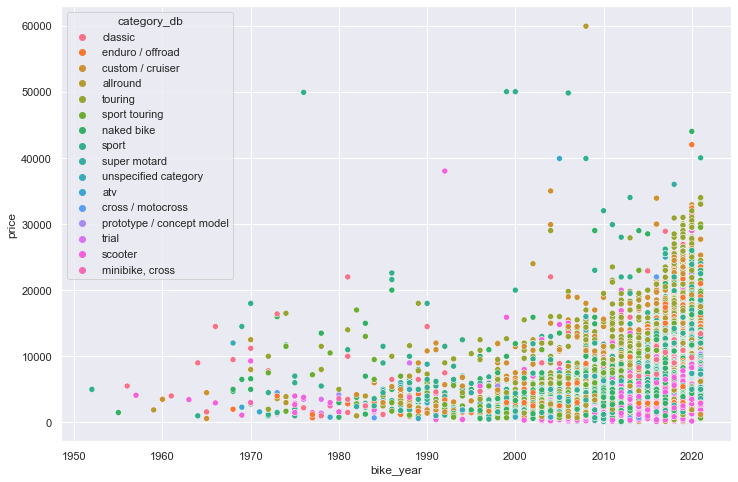

In [18]:
sns.scatterplot(x='bike_year', y='price', hue='category_db',data=data);

### vs year of release per engine size

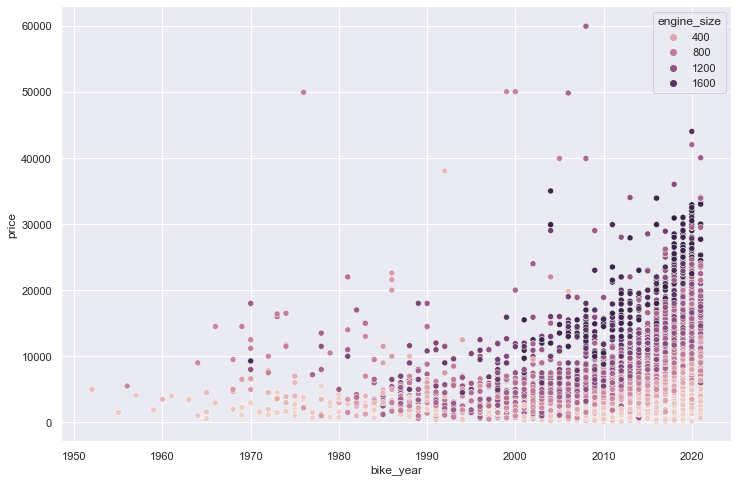

In [19]:
sns.scatterplot(x='bike_year', y='price', hue='engine_size', data=data);

### vs km/year

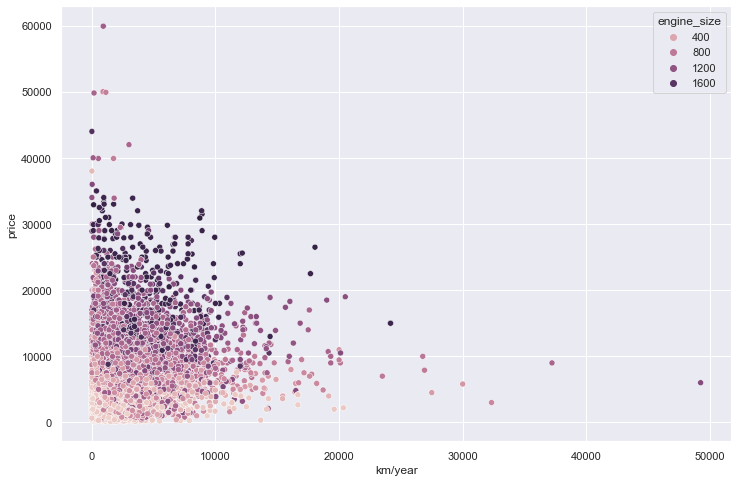

In [20]:
sns.scatterplot(x='km/year', y='price', hue='engine_size',data=data);

## Price/cc vs km

In [21]:
data['price/cc/km'].mean()

0.12555262028526112

### Average price per engine size

In [22]:
data.groupby('engine_size').agg(Mean=('price', 'mean'), Std=('price', 'std'), Count=('price', 'count'))

,Mean,Std,Count
engine_size,,,
48.0,11500.000000,NaN,1
49.0,2252.000000,489.101217,5
50.0,1948.898917,1449.762613,277
65.0,3740.000000,100.000000,4
70.0,3427.500000,616.296543,8
...,...,...,...
1868.0,26146.666667,3636.227441,9
1890.0,20663.333333,282.901632,3
1900.0,14893.333333,7453.591975,3


### Average price per category

In [23]:
data.groupby('category_db').agg(Mean=('price', 'mean'), Std=('price', 'std'), Count=('price', 'count'))

,Mean,Std,Count
category_db,,,
allround,8007.039714,5374.764796,1259
atv,9001.805970,7809.668569,67
classic,7880.573127,4044.951147,841
cross / motocross,7571.378882,4965.388688,161
custom / cruiser,9769.111801,6909.389279,805
enduro / offroad,9077.747148,5657.535722,1052
"minibike, cross",4707.428571,3281.882122,14
naked bike,7084.729110,4598.309530,2573
prototype / concept model,8230.462687,4831.246286,67


### Average price per brand

In [24]:
data.groupby('brand_db').agg(Mean=('price', 'mean'), Std=('price', 'std'), Count=('price', 'count'))

,Mean,Std,Count
brand_db,,,
access,8687.500000,8635.814476,4
ace,4290.000000,NaN,1
adly,11490.000000,NaN,1
alta,22000.000000,NaN,1
aprilia,7860.753846,5175.403414,260
...,...,...,...
voxan,9192.000000,6057.146193,5
xingyue,8108.333333,4892.346915,3
yamaha,7264.259036,5104.912203,3154


### Average price per model

In [25]:
data.groupby(['brand_db','model_db']).agg(Mean=('price', 'mean'), Std=('price', 'std'), Count=('price', 'count'))

Mean          Std  Count
brand_db model_db                                                 
access   shade                    11200.000000  8601.744009      3
         xtremeenduro300           1150.000000          NaN      1
ace      titanyzf1000rthunderace   4290.000000          NaN      1
adly     jet100                   11490.000000          NaN      1
alta     redshift                 22000.000000          NaN      1
...                                        ...          ...    ...
yamaha   yzfr7                    49999.000000     0.000000      2
zero     ds                        6990.000000          NaN      1
         heskethzero              11500.000000          NaN      1
         s                         7651.666667  6070.632312      6
zongshen cyclonerx4                4990.000000          NaN      1

[1450 rows x 3 columns]

## Correlation matrix

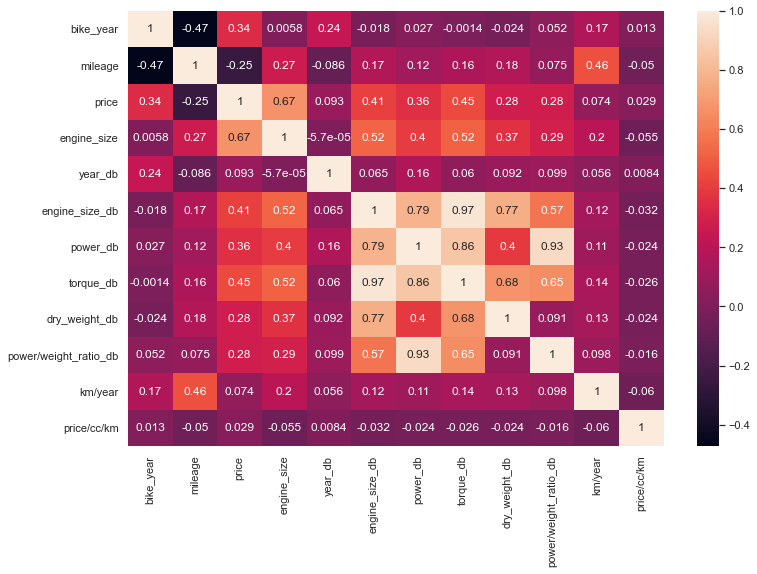

In [26]:
sns.heatmap(data.corr(), annot = True);

# BASELINE

In [27]:
# mean
average_price = data.price.mean()

#rmse
rmse_baseline = np.sqrt(sum((data['price']-average_price)**2)/((data['price'].count())))

print("Average price :", average_price)
print("RMSE Baseline", rmse_baseline )

Average price : 7749.273193646084
RMSE Baseline 5517.17079659214


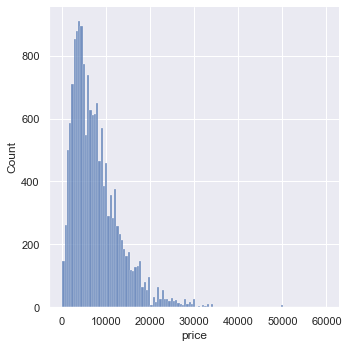

In [28]:
sns.displot(data.price)

# LINEAR REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

## Numerical features (not scaled)

In [30]:
data_1 = data.copy()
data_1.shape

(16179, 25)

In [31]:
features_1 = ['bike_year', 'mileage', 'km/year', 'engine_size']

In [32]:
for feature in features_1:
    data_1.dropna(subset=[feature],inplace=True)
data_1.shape  

(12477, 25)

In [33]:
X = data_1[features_1]
y = data_1['price']

model_1 = LinearRegression()

cv_results = cross_validate(model_1, X, y, cv=5)
cv_results['test_score'].mean()

0.6454148461779581

## Numerical features (not scaled) + brand encoded

In [34]:
data_2 = data.copy()[['brand', 'bike_year', 'mileage', 'engine_size', 'km/year', 'price']]
data_2.reset_index(inplace=True, drop=True)

ohe = OneHotEncoder(sparse=False)

ohe.fit(data_2[['brand']])

feature_encoded = ohe.transform(data_2[['brand']])

encoded = pd.DataFrame(feature_encoded, columns=ohe.categories_)

encoded = encoded.T.reset_index().set_index('level_0').T

data_2 = data_2.join(encoded,how="inner")

X = data_2.drop(columns=['brand', 'price'])
y = data_2['price']

model_2 = LinearRegression()

cv_results = cross_validate(model_2, X, y, cv=5)
cv_results['test_score'].mean()

/Users/anthonydefaria/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/anthonydefaria/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/anthonydefaria/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The s

nan

## KNeighborsRegressor - Numerical features (not scaled) + brand encoded

In [ ]:
data_2 = data.copy()[['brand', 'bike_year', 'mileage', 'engine_size', 'km/year', 'price']]
data_2.reset_index(inplace=True, drop=True)

ohe = OneHotEncoder(sparse=False)

ohe.fit(data_2[['brand']])

feature_encoded = ohe.transform(data_2[['brand']])

encoded = pd.DataFrame(feature_encoded, columns=ohe.categories_)

encoded = encoded.T.reset_index().set_index('level_0').T

data_2 = data_2.join(encoded,how="inner")

X = data_2.drop(columns=['brand', 'price'])
y = data_2['price']

In [ ]:
model_3 = KNeighborsRegressor(n_neighbors=5)

cv_results = cross_validate(model_3, X, y, cv=5)
cv_results['test_score'].mean()

## KNeighborsRegressor - Numerical features (scaled) + brand encoded

In [35]:
from sklearn.neighbors import KNeighborsRegressor

data_4 = data.copy()[['brand_db', 'bike_year','mileage','engine_size','price','km/year']]
data_4.reset_index(inplace=True, drop=True)
data_4.dropna(inplace=True)

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for feature in ['bike_year','mileage','engine_size','price','km/year']:
    data_4[feature]=scaler.fit_transform(data_4[[feature]])

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

ohe.fit(data_4[['brand_db']])

feature_encoded = ohe.transform(data_4[['brand_db']])

encoded = pd.DataFrame(feature_encoded, columns=ohe.categories_)

encoded = encoded.T.reset_index().set_index('level_0').T

data_4 = data_4.join(encoded,how="inner")

features_4 = data_4.drop(columns=['brand_db'])

In [38]:
X = features_4
y = data_4['price']

model_4 = KNeighborsRegressor(n_neighbors=3)

cv_results = cross_validate(model_4, X, y, cv=5, scoring=['neg_root_mean_squared_error', 'r2'])
print("r2", cv_results['test_r2'].mean())
print("RMSE",cv_results['test_neg_root_mean_squared_error'].mean())

r2 0.916702142972027
RMSE -0.026417738552217223


# TPOT

In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

data_5 = data.copy()[['bike_year','mileage','engine_size','price','km/year']]

X = data_5[['bike_year','mileage','engine_size','km/year']]
Y = data_5.price

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

# PIPELINE

In [52]:
# sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor


# others
from scipy import stats

# MLFLOW PARAMETERS
MLFLOW_URI = "https://mlflow.lewagon.co/"
CUSTOMURI = ""
myname = "VictorBnnt"
EXPERIMENT_NAME = f"[FR] [Paris] [{myname}] TresBonCoin"

######################################################
# Random Forest Classifier model
######################################################
grid_ETR = {'model__max_depth': stats.randint(1, 1000),
            'model__algorithm': ['ball_tree', 'kd_tree'],
            'model__leaf_size': np.linspace(25, 40, num=45),
            'model__p': [1,2],
            "preprocessor__scaler": [StandardScaler(), RobustScaler(), MinMaxScaler()]
            }
params_ETR = {"random_grid_search": grid_ETR,
              "model": ExtraTreesRegressor()}
######################################################

######################################################
# KNeighborsRegressor model
######################################################
grid_KNR = {'model__weights':['distance','uniform'] ,
            'model__min_samples_split': [2, 4, 6, 8, 10],
            "preprocessor__scaler": [StandardScaler(), RobustScaler(), MinMaxScaler()]
            }
params_KNR = {"random_grid_search": grid_ETR,
              "model": KNeighborsRegressor()}
######################################################